### This page is for implementing the following model changes:

<img src="modeldiagram.png" width="500"/>

### Import relevant Python packages

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

### Import data

In [18]:
# import Lower Granite data

#note that some of the tributary data has negative valuse that we should probably remove somwehere in this cell

lower_granite_inflow = pd.read_csv('lowergraniteinflow.csv')
lower_granite_storage = pd.read_csv('lowergranitestorage.csv')

#no lower granite trib data
lower_granite_trib = lower_granite_storage.drop('S (unit:cfs)', axis=1)
lower_granite_trib['L (unit:cfs)'] = lower_granite_storage['S (unit:cfs)'].clip(lower=0, upper=0)
lower_granite_data = lower_granite_inflow.merge(lower_granite_storage, how='inner', on=['date'])
lower_granite_data = lower_granite_data.merge(lower_granite_trib, how='inner', on=['date'])
lower_granite_data['date'] = pd.to_datetime(lower_granite_data['date'])
display(lower_granite_data)

# import Little Goose data
little_goose_storage = pd.read_csv('littlegoosestorage.csv')

#NO TRIB DATA FOR LITTLE GOOSE
little_goose_trib = little_goose_storage.drop('S (unit:cfs)', axis=1)
little_goose_trib['L (unit:cfs)'] = little_goose_storage['S (unit:cfs)'].clip(lower=0, upper=0)

little_goose_data = little_goose_trib.merge(little_goose_storage, how='inner', on=['date'])
little_goose_data['date'] = pd.to_datetime(little_goose_data['date'])
display(little_goose_data)

# import Lower Monumental data
lower_monumental_storage = pd.read_csv('lowermonumentalstorage.csv')
lower_monumental_trib = pd.read_csv('lowermontrib.csv')
lower_monumental_trib['L (unit:cfs)'] = lower_monumental_trib['L (unit:cfs)'].clip(lower=0)
lower_monumental_data = lower_monumental_trib.merge(lower_monumental_storage, how='inner', on=['date'])
lower_monumental_data['date'] = pd.to_datetime(lower_monumental_data['date'])

# import Ice Harbor data
ice_harbor_storage = pd.read_csv('iceharborstorage.csv')
ice_harbor_trib = pd.read_csv('iceharbortrib.csv')
ice_harbor_trib['L (unit:cfs)'] = ice_harbor_trib['L (unit:cfs)'].clip(lower=0)
ice_harbor_data = ice_harbor_trib.merge(ice_harbor_storage, how='inner', on=['date'])
ice_harbor_data['date'] = pd.to_datetime(ice_harbor_data['date'])

display(ice_harbor_data)

,date,A (unit:cfs),S (unit:cfs),L (unit:cfs)
0,1928-07-01,63918,0,0
1,1928-07-02,57164,0,0
2,1928-07-03,52531,0,0
3,1928-07-04,49500,0,0
4,1928-07-05,47309,0,0
...,...,...,...,...
32959,2018-09-26,21728,-1363,0
32960,2018-09-27,20718,1275,0
32961,2018-09-28,20597,-2374,0
32962,2018-09-29,20278,2989,0


,date,L (unit:cfs),S (unit:cfs)
0,1928-07-01,0,0
1,1928-07-02,0,0
2,1928-07-03,0,0
3,1928-07-04,0,0
4,1928-07-05,0,0
...,...,...,...
32959,2018-09-26,0,1687
32960,2018-09-27,0,153
32961,2018-09-28,0,256
32962,2018-09-29,0,1125


,date,L (unit:cfs),S (unit:cfs)
0,1928-07-01,0,0
1,1928-07-02,0,0
2,1928-07-03,0,0
3,1928-07-04,0,0
4,1928-07-05,0,0
...,...,...,...
32959,2018-09-26,0,1710
32960,2018-09-27,0,1619
32961,2018-09-28,0,1485
32962,2018-09-29,0,-2834


<Axes: xlabel='date', ylabel='A (unit:cfs)'>

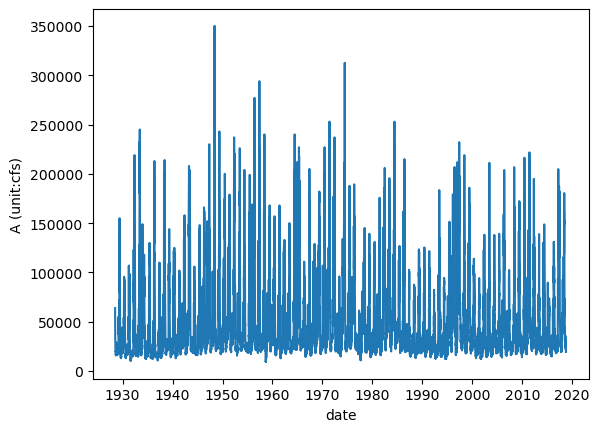

In [19]:
#plot LGR inflow
sns.lineplot(x='date', y='A (unit:cfs)', data=lower_granite_data)

In [20]:
#boxplots will have to be remade AFTER simulation is complete
# pre_cutoff = datetime(1970,1,1)
# little_goose_pre = little_goose_outflow[little_goose_outflow['date'] <= pre_cutoff]
# little_goose_pre_max = little_goose_pre.groupby(little_goose_pre['date'].dt.year)['H (unit:cfs)'].max()
# little_goose_pre_min = little_goose_pre.groupby(little_goose_pre['date'].dt.year)['H (unit:cfs)'].min()

# post_cutoff = datetime(1993,1,1)
# little_goose_post = little_goose_outflow[little_goose_outflow['date'] >= post_cutoff]
# little_goose_post_max = little_goose_post.groupby(little_goose_post['date'].dt.year)['H (unit:cfs)'].max()
# little_goose_post_min = little_goose_post.groupby(little_goose_post['date'].dt.year)['H (unit:cfs)'].min()

# plt.figure(figsize=(12,5))

# plt.subplot(1,2,1)
# plt.boxplot([little_goose_pre_max, little_goose_post_max], tick_labels=['pre max flow', 'post max flow'])
# plt.title('lower granite boxplots over 90 years: max streamflow')

# plt.subplot(1,2,2)
# plt.boxplot([little_goose_pre_min, little_goose_post_min], tick_labels=['pre min flow', 'post min flow'])
# plt.title('min streamflow')

## Initialize reservoirs

In [116]:
from Reservoir3 import Reservoir

ice_harbor = Reservoir(SA=9200*4047,num_turb=6,capacity=603000,tail_elev=339,pool_elev=446,bottom_elev=310,fish_pass=0.965, area=550_000_000, pc=106_000)
lower_monumental = Reservoir(SA=6590*4047,num_turb=6,capacity=810000,tail_elev=439,pool_elev=548.3,bottom_elev=406,fish_pass=0.965, area=1_610_000_000, pc=130_000)
little_goose = Reservoir(SA=10025*4047,num_turb=6,capacity=903000,tail_elev=539,pool_elev=646.5,bottom_elev=500,fish_pass=0.9775, area=1_175_000_000, pc=130_000)
lower_granite = Reservoir(SA=8900*4047,num_turb=6,capacity=810000,tail_elev=636,pool_elev=746.5,bottom_elev=590,fish_pass=1, area=2_477_000_000, pc=130_000)


## Simulate Reservoir Storage

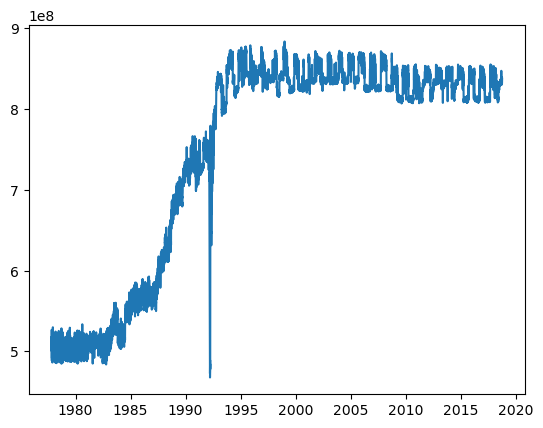

In [22]:
lower_granite_storage = lower_granite.simulate_storage(1, lower_granite_data['S (unit:cfs)'],0)

plt.plot(lower_granite_data['date'][18000:], lower_granite_storage[18000:])

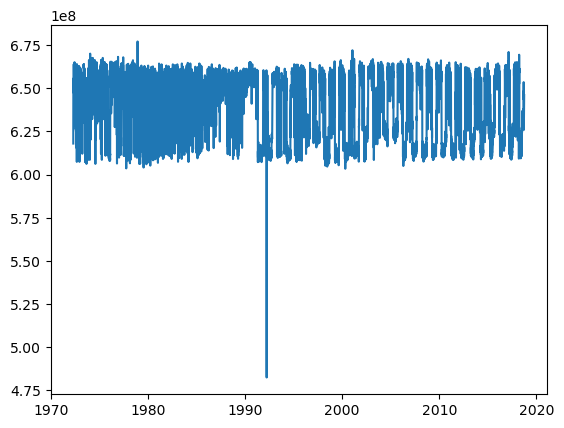

In [23]:
little_goose_storage = little_goose.simulate_storage(1, little_goose_data['S (unit:cfs)'],0)

plt.plot(little_goose_data['date'][16000:], little_goose_storage[16000:])

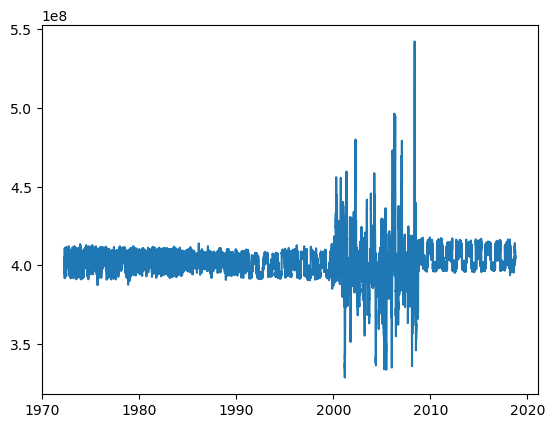

In [24]:
lower_monumental_storage = lower_monumental.simulate_storage(1, lower_monumental_data['S (unit:cfs)'], 0)

plt.plot(lower_monumental_data['date'][16000:], lower_monumental_storage[16000:])

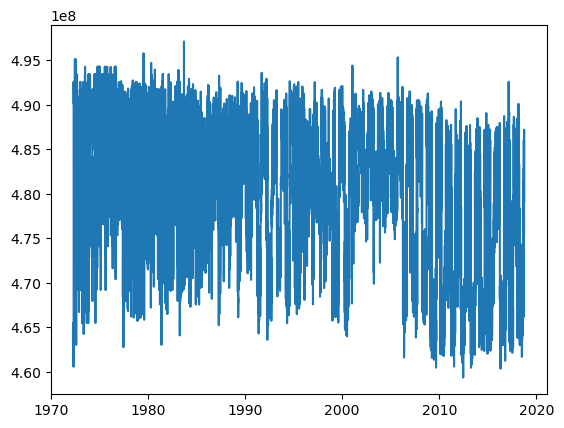

In [25]:
ice_harbor_storage = ice_harbor.simulate_storage(1, ice_harbor_data['S (unit:cfs)'], 0)

plt.plot(ice_harbor_data['date'][16000:], ice_harbor_storage[16000:])

### Test Reservoirs Simulation & Plot Outflow Data against tabulated BPA outflows

In [26]:
LGR_outflow, LGR_hydro, LGR_fish = lower_granite.simulate(1, 0, lower_granite_data['date'], lower_granite_data['A (unit:cfs)']*2447, 0, lower_granite_data['S (unit:cfs)'])

LGO_outflow, LGO_hydro, LGO_fish = little_goose.simulate(1, 0, little_goose_data['date'], LGR_outflow, 0, little_goose_data['S (unit:cfs)'])

LM_outflow, LM_hydro, LM_fish = lower_monumental.simulate(1, 0, lower_monumental_data['date'], LGO_outflow, lower_monumental_data['L (unit:cfs)'], lower_monumental_data['S (unit:cfs)'])

IH_outflow, IH_hydro, IH_fish = ice_harbor.simulate(1, 0,ice_harbor_data['date'], LM_outflow, ice_harbor_data['L (unit:cfs)'], ice_harbor_data['S (unit:cfs)'])


2710464.0


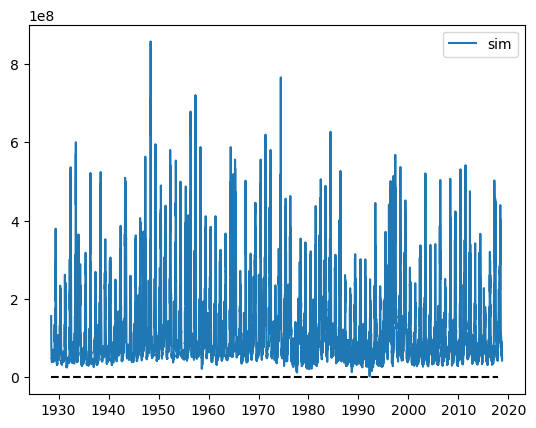

In [102]:
#plotting direct outflow data versus simulated outflow for lower granite
lower_granite_outflow = pd.read_csv('lowergraniteoutflow.csv')
lower_granite_outflow['date'] = pd.to_datetime(lower_granite_outflow['date'])
print(np.min(LGR_outflow))
plt.plot(lower_granite_data['date'],LGR_outflow, label='sim')
# plt.plot(lower_granite_data['date'],lower_granite_outflow['H (unit:cfs)']*2447)
plt.hlines(0,datetime(1928,7,1), datetime(2018,1,1), colors='black', linestyles='dashed')
plt.legend()
plt.show()

5978176.440000001


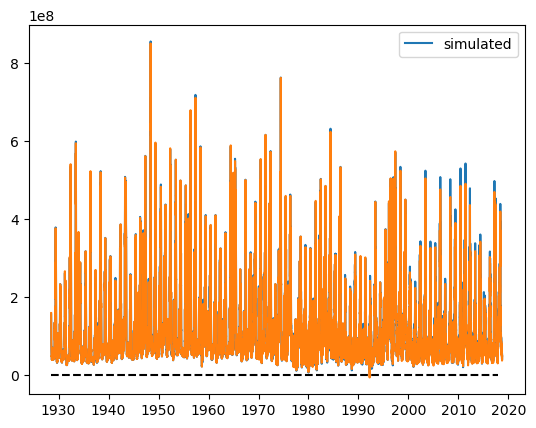

In [97]:
#plotting direct outflow data versus simulated outflow for little goose
little_goose_outflow = pd.read_csv('littlegooseoutflow.csv')
little_goose_outflow['date'] = pd.to_datetime(little_goose_outflow['date'])
print(np.min(LGO_outflow))
plt.plot(little_goose_data['date'],LGO_outflow, label='simulated')
plt.plot(little_goose_data['date'],little_goose_outflow['H (unit:cfs)']*2447)
plt.hlines(0,datetime(1928,7,1), datetime(2018,1,1), colors='black', linestyles='dashed')
plt.legend()
plt.show()

-2874568.1599999964


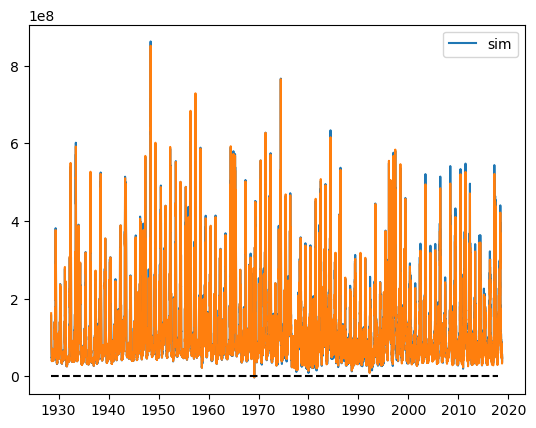

In [93]:
#plotting direct outflow data versus simulated outflow for lower monumental
lower_monumental_outflow = pd.read_csv('lowermonumentaloutflow.csv')
lower_monumental_outflow['date'] = pd.to_datetime(lower_monumental_outflow['date'])
print(np.min(LM_outflow))
plt.plot(lower_monumental_data['date'],LM_outflow, label='sim')
plt.plot(lower_monumental_data['date'],lower_monumental_outflow['H (unit:cfs)']*2447)
plt.hlines(0,datetime(1928,7,1), datetime(2018,1,1), colors='black', linestyles='dashed')
plt.legend()
plt.show()

-10378641.439999996


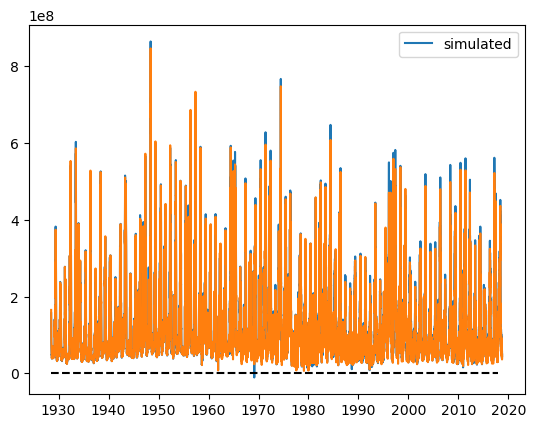

In [92]:
#plotting direct outflow data versus simulated outflow for ice harbor
ice_harbor_outflow = pd.read_csv('iceharboroutflow.csv')
ice_harbor_outflow['date'] = pd.to_datetime(ice_harbor_outflow['date'])
print(np.min(IH_outflow))
plt.plot(ice_harbor_data['date'],IH_outflow, label='simulated')
plt.plot(ice_harbor_data['date'],ice_harbor_outflow['H (unit:cfs)']*2447)
plt.hlines(0,datetime(1928,7,1), datetime(2018,1,1), colors='black', linestyles='dashed')
plt.legend()
plt.show()

### Simulate All Possible Combinations

In [ ]:
#create a list of all possible dam removal combinations/scenarios
import itertools
elements = [0,1]
combos = list(itertools.product(elements, repeat=4))
# example [0,0,0,0]
hydro_sums = np.zeros(16)
fish_result = np.ones(16)
res_list = [lower_granite,little_goose, lower_monumental, ice_harbor] #list of initialized reservoirs above
res_data_list = [lower_granite_data,little_goose_data, lower_monumental_data, ice_harbor_data] #list of initialized reservoir data above
outflow = lower_granite_data['A (unit:cfs)']*86400*.0283
for i, combo in enumerate(combos):
    for k in range(len(res_list)):
        outflow, hydro, fish = (res_list[k].simulate(combo[k], 0, res_data_list[k]['date'], outflow, res_data_list[k]['L (unit:cfs)'], res_data_list[k]['S (unit:cfs)']))
        # res_data_list[k]['Outflow (m^3/s)'] = outflow
        hydro_sums[i] += hydro
        fish_result[i] *= fish

results = pd.DataFrame({'Sim': combos,'Avg hydro': hydro_sums,'Fish Pass': fish_result})
results = results.set_index('Sim')
display(results)

,Avg hydro,Fish Pass
Sim,,
"(0, 0, 0, 0)",0.000000e+00,1.000000
"(0, 0, 0, 1)",2.397831e+08,0.965000
"(0, 0, 1, 0)",2.780772e+08,0.965000
"(0, 0, 1, 1)",5.353311e+08,0.931225
"(0, 1, 0, 0)",2.125312e+08,0.977500
"(0, 1, 0, 1)",4.786421e+08,0.943288
"(0, 1, 1, 0)",5.305484e+08,0.943288
"(0, 1, 1, 1)",8.122597e+08,0.910272
"(1, 0, 0, 0)",3.321843e+08,1.000000


### Rank in order of High to Low (Fish and Hydro)

In [32]:
display(results.sort_values(by = 'Avg hydro', ascending=False))
display(results.sort_values(by = 'Fish Pass',ascending=False))

,Avg hydro,Fish Pass
Sim,,
"(1, 1, 1, 1)",1.297805e+09,0.910272
"(1, 1, 1, 0)",9.885909e+08,0.943288
"(1, 0, 1, 1)",9.768395e+08,0.931225
"(1, 1, 0, 1)",9.165384e+08,0.943288
"(0, 1, 1, 1)",8.122597e+08,0.910272
"(1, 0, 1, 0)",6.797442e+08,0.965000
"(1, 0, 0, 1)",6.176265e+08,0.965000
"(1, 1, 0, 0)",6.156072e+08,0.977500
"(0, 0, 1, 1)",5.353311e+08,0.931225


,Avg hydro,Fish Pass
Sim,,
"(0, 0, 0, 0)",0.000000e+00,1.000000
"(1, 0, 0, 0)",3.321843e+08,1.000000
"(1, 1, 0, 0)",6.156072e+08,0.977500
"(0, 1, 0, 0)",2.125312e+08,0.977500
"(1, 0, 0, 1)",6.176265e+08,0.965000
"(1, 0, 1, 0)",6.797442e+08,0.965000
"(0, 0, 1, 0)",2.780772e+08,0.965000
"(0, 0, 0, 1)",2.397831e+08,0.965000
"(1, 1, 1, 0)",9.885909e+08,0.943288


### Simulate all reservoirs function?

In [138]:
def simulate_all(): #eventually take in storage?
    res_list = [lower_granite,little_goose, lower_monumental, ice_harbor] #list of initialized reservoirs above
    res_data_list = [lower_granite_data,little_goose_data, lower_monumental_data, ice_harbor_data] #list of initialized reservoir data above
    outflow = lower_granite_data['A (unit:cfs)']*86400*.0283
    
    results = pd.DataFrame(index=['Min Out (m^3/d)','Avg Hydro','Fish Pass'],columns=['LGR','LGO', 'LM', 'IH'])
    col_names = ['LGR','LGO','LM','IH']
    for i, res in enumerate(res_list):
        outflow, avg_hydro, fish = (res.simulate(1, 0, res_data_list[i]['date'], outflow, res_data_list[i]['L (unit:cfs)'], res_data_list[i]['S (unit:cfs)']))
        results.loc['Min Out (m^3/d)',col_names[i]] = np.min(outflow)
        results.loc['Avg Hydro',col_names[i]] = np.round(avg_hydro,0)
        results.loc['Fish Pass',col_names[i]] = fish
    return results
display(simulate_all())

,LGR,LGO,LM,IH
Min Out (m^3/d),2660290.56,5926970.88,-2978156.16,-10482229.44
Avg Hydro,265910892.0,191511714.0,264756212.0,234731946.0
Fish Pass,1,0.9775,0.965,0.965


In [152]:
#target minimum flows
target_min_flows = pd.DataFrame({'LGR':[16128],'LGO': [16169], 'LM': [16388], 'IH':	[16391]})
display(target_min_flows)
display(float(target_min_flows['LGR']))
existing_min_flows = pd.DataFrame({'LGR':[12956],'LGO': [11004], 'LM': [11882], 'IH': [10522]})
display(existing_min_flows)

,LGR,LGO,LM,IH
0,16128,16169,16388,16391


C:\Users\grcra\AppData\Local\Temp\ipykernel_46460\1173824291.py:4: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  display(float(target_min_flows['LGR']))


16128.0

,LGR,LGO,LM,IH
0,12956,11004,11882,10522


### Simulate all reservoirs with dstorage input (TO BE USED IN OPTIMIZATION)

In [168]:
def simulate_allopt(): #eventually take in storage?
    res_list = [lower_granite,little_goose, lower_monumental, ice_harbor] #list of initialized reservoirs above
    res_data_list = [lower_granite_data,little_goose_data, lower_monumental_data, ice_harbor_data] #list of initialized reservoir data above
    outflow = lower_granite_data['A (unit:cfs)']*86400*.0283
    
    results = pd.DataFrame(index=['Min Out (m^3/d)','Avg Hydro','Fish Pass'],columns=['LGR','LGO', 'LM', 'IH'])
    col_names = ['LGR','LGO','LM','IH']
    for i, res in enumerate(res_list):
        outflow, avg_hydro, fish = (res.simulate(1, 0, res_data_list[i]['date'], outflow, res_data_list[i]['L (unit:cfs)'], res_data_list[i]['S (unit:cfs)']))
        results.loc['Min Out (m^3/d)',col_names[i]] = np.min(outflow)
        results.loc['Avg Hydro',col_names[i]] = np.round(avg_hydro,0)
        results.loc['Fish Pass',col_names[i]] = fish
    results.loc['outflow_deviation', col_names] = target_min_flows[col_names].iloc[0]*86400*0.0283 - results.loc['Min Out (m^3/d)', col_names]
    avg_deviation = results.loc['outflow_deviation', col_names].astype(float).mean()
    total_hydro = results.loc['Avg Hydro', col_names].astype(float).sum()
    # display(avg_deviation)
    # display(total_hydro)
    return avg_deviation, total_hydro
display(simulate_allopt())

(np.float64(40997938.32000001), np.float64(956910764.0))

### Optimization
- Plan to allow dS to fluctuate between 0 and current value

Objectives:

- Minimize distance between minimum regulated and minimum natural streamflow for entire system

- Maximize annual avg hydropower for entire system

Decision variables:
- storage?
- target min flow? target storage?
- is that it?

Constraints:
- target min flow?
- min flow range between target and regulated
- nonnegativity

Ideas:
- make a storage rule curve? (target storage)
- do we need a new simulation called sim_natural?
- i think no since we can etierh use the portion of the streamflow that is before the dams were built or use the modeled flow with keep = 0 for all dams

In [ ]:
#pip install platypus
from platypus import NSGAII, Problem, Real

In [136]:
# %% Step 3 - Direct Policy Search with NSGA-II
# Define the optimization problem
class DamOptimization(Problem):
    def __init__(self):
        # Create a problem with 4 decision variable and 2 objectives
        super(DamOptimization, self).__init__(4, 2)  # 4 decision variable, 2 objectives
        self.types[:] = [Real(0,float(existing_min_flows['LGR (cfs)'])),  #minimum_outflow LGR
                         Real(0,float(existing_min_flows['LGO (cfs)'])),  #minimum_outflow LGO
                         Real(0,float(existing_min_flows['LM (cfs)'])),  #minimum_outflow LM
                         Real(0,float(existing_min_flows['IH (cfs)'])) ] #minimum_outflow IH
    
    def evaluate(self, solutions):
        # Check if a single solution is passed
        if not isinstance(solutions, list):
            solutions = [solutions]

        for s in solutions:
            # Simulate the lake with current parameters
            LGR_min, LGO_min, LM_min, IH_min = s.variables
            avg_hydro = 0
            dev = 0
            dstorage = lower_granite_data['S (unit:cfs)']
            
            # Run the simulation function (ensure this is defined)
            min_out, hydro, fish= simulate_all(dstorage)
            
            # Compute objectives
            avg_deviation = ()  # Objective 1
            total_annual_hydro = np.mean(avg_hydro)  # Objective 2
            
            # Set the objectives for the solution
            s.objectives[:] = [avg_deviation, total_annual_hydro]

# Create the problem instance
problem = DamOptimization()

# Set up and run the algorithm
population_size = 50  # Change this to your desired population size
num_generations = 20  # Change this to your desired number of generations
total_evaluations = population_size * num_generations # Calculate total evaluations based on population size and generations
algorithm = NSGAII(problem,population_size=population_size)
algorithm.run(100)  # Run for 100 evaluations

# Extract results for analysis
results = np.array([[s.objectives[0], s.objectives[1]] for s in algorithm.result])

# Plot results
plt.figure()
plt.plot(results[:, 0], results[:, 1], 'k*')
plt.xlabel('Flooded area [km^2]')
plt.ylabel('Irrigation deficit [m^3/s]^2')
plt.title('Optimized Solutions using Platypus NSGA-II')
plt.grid(True)
plt.show()

C:\Users\grcra\AppData\Local\Temp\ipykernel_46460\491490073.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  self.types[:] = [Real(0,float(existing_min_flows['LGR (cfs)'])),  #minimum_outflow LGR
C:\Users\grcra\AppData\Local\Temp\ipykernel_46460\491490073.py:8: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Real(0,float(existing_min_flows['LGO (cfs)'])),  #minimum_outflow LGO
C:\Users\grcra\AppData\Local\Temp\ipykernel_46460\491490073.py:9: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  Real(0,float(existing_min_flows['LM (cfs)'])),  #minimum_outflow LM
C:\Users\grcra\AppData\Local\Temp\ipykernel_46460\491490073.py:10: FutureWarning: Calling float on a single element Series is deprecated and w

ValueError: too many values to unpack (expected 3)